<a href="https://colab.research.google.com/github/GoodJinMo/kfq_ML_2023/blob/main/ML_%EC%BA%90%EA%B8%80_%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_%EC%82%AC%EA%B8%B0_%EA%B2%80%EC%B6%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


In [27]:
import shutil
shutil.copyfile('/content/drive/MyDrive/Colab Notebooks/dimu.py', 'dimu.py')

'dimu.py'

In [28]:
!python dimu.py

suc


In [21]:
from dimu import din

# 언더 샘플링과 오버 샘플링

---

오버 샘플링 방식이 예측 성능상 조금 유리한 경우가 많아 상대적으로 더 많이 사용함

**언더 샘플링** - 많은 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식

**오버 샘플링** - 이상 데이터와 같이 적은 데이터 세트를 증식하여 학습을 위한 충분한 데이터를 확보하는 방법

In [3]:
import pandas as pd
import numpy as np

In [1]:
path='/content/drive/MyDrive/Colab Notebooks/creditcard.csv'

## 데이터확인

In [4]:
df=pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
df=df.drop('Time',axis=1)

In [10]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [55]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
V1,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,7.388135e-17,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.096375,-0.101347
V2,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,-3.991394e-16,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.450317,0.091289
V3,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,1.156587e-15,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.033913,-0.192961
V4,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,2.232685e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,-0.004677,0.133447
V5,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,-5.202306e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.286189,-0.094974
V6,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,5.932243e-17,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.163822,-0.043643
V7,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,-7.492834e-17,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.095758,-0.187257
V8,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,-2.801370e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.020690,0.019875
V9,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,-4.642274e-16,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.080498,-0.097733
V10,7.388135e-17,-3.991394e-16,1.156587e-15,2.232685e-16,-5.202306e-16,5.932243e-17,-7.492834e-17,-2.801370e-16,-4.642274e-16,1.000000e+00,...,1.177547e-15,-6.418202e-16,3.214491e-16,-1.355885e-16,-2.846052e-16,-3.028119e-16,-2.197977e-16,4.864782e-17,-0.009621,-0.216883


## 일차 가공

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

In [13]:
data=df.drop('Class',axis=1)
label=df['Class']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(data, label)

In [17]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
preds = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)[:, 1]
din.get_clf_eval(y_test,preds,pred_proba)


오차 행렬
[[71070    14]
 [   35    83]]
정확도: 0.9993, 정밀도: 0.8557, 재현율: 0.7034,      F1: 0.7721, AUC:0.9748


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
def get_model_train_eval(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  pred_proba = model.predict_proba(x_test)[:,1]
  print(model.__class__.__name__)
  din.get_clf_eval(y_test,pred,pred_proba)

In [33]:
knn=KNeighborsClassifier()
get_model_train_eval(knn,x_train, x_test, y_train, y_test)

KNeighborsClassifier
오차 행렬
[[71080     4]
 [   41    77]]
정확도: 0.9994, 정밀도: 0.9506, 재현율: 0.6525,      F1: 0.7739, AUC:0.8727


In [38]:
lgbm = LGBMClassifier(n_estimators=400, learning_rate=0.05)
lgbm.fit(x_train,y_train)
preds = lgbm.predict(x_test)
pred_proba = lgbm.predict_proba(x_test)[:, 1]
din.get_clf_eval(y_test,preds,pred_proba)


오차 행렬
[[70840   244]
 [   29    89]]
정확도: 0.9962, 정밀도: 0.2673, 재현율: 0.7542,      F1: 0.3947, AUC:0.8387


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


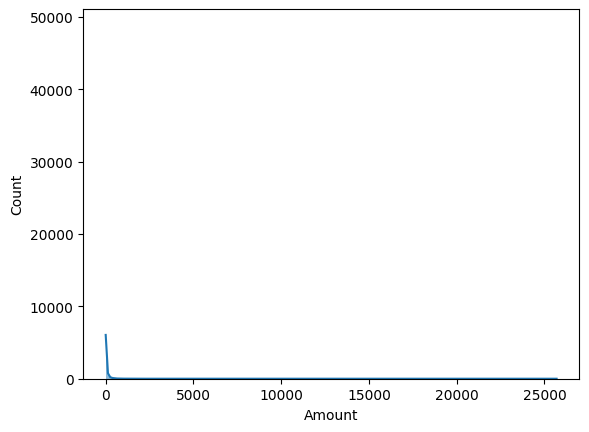

In [49]:
sns.histplot(df['Amount'],kde=True)
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss =StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,
                                                 label)

In [45]:
lgbm = LGBMClassifier(n_estimators=1000,
                      num_leaves=64,
                      n_jobs=-1,
                      boost_from_average=False)
lr = LogisticRegression()
knn =KNeighborsClassifier()
models = [lr,knn,lgbm]
for model in models:
  get_model_train_eval(model,x_train,x_test,y_train,y_test)

LogisticRegression
오차 행렬
[[71079    10]
 [   39    74]]
정확도: 0.9993, 정밀도: 0.8810, 재현율: 0.6549,      F1: 0.7513, AUC:0.9754
KNeighborsClassifier
오차 행렬
[[71080     9]
 [   29    84]]
정확도: 0.9995, 정밀도: 0.9032, 재현율: 0.7434,      F1: 0.8155, AUC:0.9202
LGBMClassifier
오차 행렬
[[71080     9]
 [   23    90]]
정확도: 0.9996, 정밀도: 0.9091, 재현율: 0.7965,      F1: 0.8491, AUC:0.9766


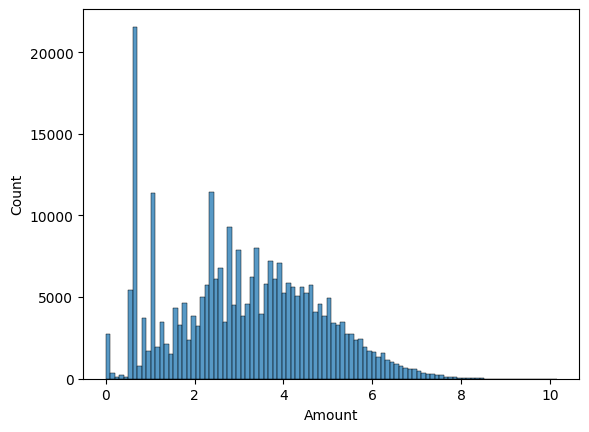

In [51]:
la=np.log1p(df['Amount'])
sns.histplot(la,bins=100)
plt.show()


In [52]:
df['Amount']=np.log1p(df['Amount'])
data=df.drop('Class',axis=1)
label=df['Class']

In [53]:
ss =StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,
                                                 label)

In [54]:
lgbm = LGBMClassifier(n_estimators=1000,
                      num_leaves=64,
                      n_jobs=-1,
                      boost_from_average=False)
lr = LogisticRegression()
knn =KNeighborsClassifier()
models = [lr,knn,lgbm]
for model in models:
  get_model_train_eval(model,x_train,x_test,y_train,y_test)

LogisticRegression
오차 행렬
[[71067    10]
 [   60    65]]
정확도: 0.9990, 정밀도: 0.8667, 재현율: 0.5200,      F1: 0.6500, AUC:0.9623
KNeighborsClassifier
오차 행렬
[[71072     5]
 [   40    85]]
정확도: 0.9994, 정밀도: 0.9444, 재현율: 0.6800,      F1: 0.7907, AUC:0.8799
LGBMClassifier
오차 행렬
[[71073     4]
 [   39    86]]
정확도: 0.9994, 정밀도: 0.9556, 재현율: 0.6880,      F1: 0.8000, AUC:0.9709


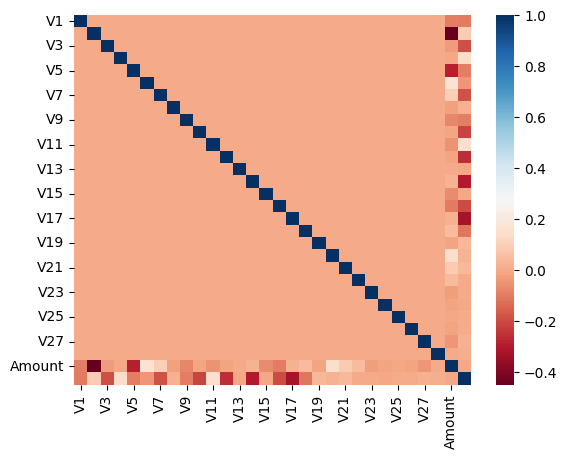

In [57]:
cr = df.corr()
sns.heatmap(cr,cmap='RdBu')
plt.show()


## 이상치 제거


In [59]:
def get_outlier(df=None,fil=None ,column=None, weight=1.5):
    fraud = df[fil][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index


In [62]:
oi=get_outlier(df,df['Class']==1,'V14')

In [61]:
df['V14'].describe()

count    2.848070e+05
mean     1.207294e-15
std      9.585956e-01
min     -1.921433e+01
25%     -4.255740e-01
50%      5.060132e-02
75%      4.931498e-01
max      1.052677e+01
Name: V14, dtype: float64

In [64]:
for column in df.columns:
    oi = get_outlier(df,df['Class']==1,column)
    df = df.drop(oi)


In [65]:
data = df.drop('Class',axis=1)
label = df['Class']
ss =StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)
x_train,x_test,y_train,y_test = train_test_split(scaled_data,
                                                 label)

In [66]:
lgbm = LGBMClassifier(n_estimators=1000,
                      num_leaves=64,
                      n_jobs=-1,
                      boost_from_average=False)
lr = LogisticRegression()
knn =KNeighborsClassifier()
models = [lr,knn,lgbm]
for model in models:
  get_model_train_eval(model,x_train,x_test,y_train,y_test)

LogisticRegression
오차 행렬
[[71067     8]
 [   32    25]]
정확도: 0.9994, 정밀도: 0.7576, 재현율: 0.4386,      F1: 0.5556, AUC:0.9712
KNeighborsClassifier
오차 행렬
[[71070     5]
 [   19    38]]
정확도: 0.9997, 정밀도: 0.8837, 재현율: 0.6667,      F1: 0.7600, AUC:0.8946
LGBMClassifier
오차 행렬
[[71069     6]
 [   17    40]]
정확도: 0.9997, 정밀도: 0.8696, 재현율: 0.7018,      F1: 0.7767, AUC:0.9707


## 오버 샘플링 적용

In [68]:
from imblearn.over_sampling import SMOTE

In [69]:
smote = SMOTE(random_state=0)
x_train_over, y_train_over = smote.fit_resample(x_train, y_train)
print('SMOTE 적용 후 분포: \n', pd.Series(y_train_over).value_counts())


SMOTE 적용 후 분포: 
 0    213240
1    213240
Name: Class, dtype: int64


In [71]:
lr = LogisticRegression()
lr.fit(x_train_over,y_train_over)
preds = lr.predict(x_test)
pred_proba = lr.predict_proba(x_test)[:, 1]
din.get_clf_eval(y_test,preds,pred_proba)


오차 행렬
[[68633  2442]
 [    6    51]]
정확도: 0.9656, 정밀도: 0.0205, 재현율: 0.8947,      F1: 0.0400, AUC:0.9783
